In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data set
path=r'/Users/dariaperestiuk/Documents/02_02_24 Instacart Basket Analysis'
df_small=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Small_sampling.pkl'))

In [ ]:
# Data Consistency Checks
df['prices'].describe()

In [3]:
df_small.describe()

,product_id,department_id,prices,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,mean_product_price,median_days_between_orders,Age,Dependants,income
count,9.729729e+06,9.729729e+06,9.729729e+06,9.729729e+06,9.729729e+06,9.729729e+06,9.729729e+06,9.106295e+06,9.729729e+06,9.729729e+06,9.729729e+06,9.729729e+06,9.729729e+06,9.729729e+06,9.729729e+06,9.729729e+06
mean,2.557671e+04,9.922400e+00,1.191476e+01,1.710899e+06,1.714131e+01,2.738328e+00,1.342407e+01,1.110586e+01,8.348934e+00,5.896636e-01,3.304093e+01,1.200453e+01,1.039780e+01,4.946742e+01,1.502049e+00,9.944751e+04
std,1.410057e+04,6.281390e+00,4.860754e+02,9.874473e+05,1.753525e+01,2.089807e+00,4.246574e+00,8.781947e+00,7.127499e+00,4.918948e-01,2.514556e+01,8.428160e+01,7.129107e+00,1.848453e+01,1.118676e+00,4.308724e+04
min,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,1.351700e+04,4.000000e+00,4.200000e+00,8.558710e+05,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.000000e+00,0.000000e+00,1.300000e+01,7.391892e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.698800e+04
50%,2.525600e+04,9.000000e+00,7.400000e+00,1.710868e+06,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,6.000000e+00,1.000000e+00,2.600000e+01,7.829457e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.662600e+04
75%,3.794000e+04,1.600000e+01,1.130000e+01,2.566100e+06,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.100000e+01,1.000000e+00,4.700000e+01,8.258699e+00,1.300000e+01,6.500000e+01,3.000000e+00,1.279130e+05
max,4.968800e+04,2.100000e+01,9.999900e+04,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.450000e+02,1.000000e+00,9.900000e+01,2.500542e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [ ]:
df['prices'].mean ()

In [4]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9729729 entries, 0 to 32434209
Data columns (total 30 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   product_id                  int32  
 1   product_name                object 
 2   department_id               int8   
 3   prices                      float64
 4   order_id                    int32  
 5   user_id                     object 
 6   order_number                int8   
 7   order_day_of_week           int8   
 8   order_hour_of_day           int64  
 9   days_since_prior_order      float64
 10  add_to_cart_order           int64  
 11  reordered                   int64  
 12  price_range_loc             object 
 13  busiest_days                object 
 14  busiest_period_of_day       object 
 15  max_order                   int8   
 16  loyalty_flag                object 
 17  mean_product_price          float64
 18  spending_flag               object 
 19  median_days_between_

In [5]:
df_small.shape

(9729729, 30)

In [45]:
df_small['order_frequency'].head()

0     Frequent customer
2     Frequent customer
3     Frequent customer
6     Frequent customer
10    Frequent customer
Name: order_frequency, dtype: object

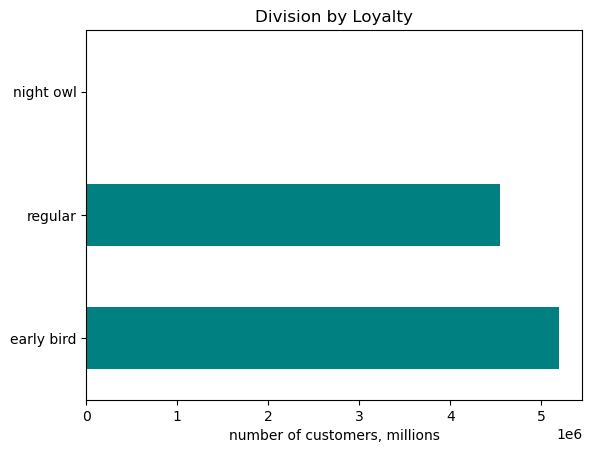

In [9]:
bar_1=df_small['Shopping_Behavior'].value_counts().plot.barh(title = 'Division by Loyalty', xlabel = 'number of customers, millions', color=['teal'])

In [10]:
df_small['Shopping_Behavior'].value_counts(dropna = False)

early bird    5187961
regular       4540625
night owl        1143
Name: Shopping_Behavior, dtype: int64

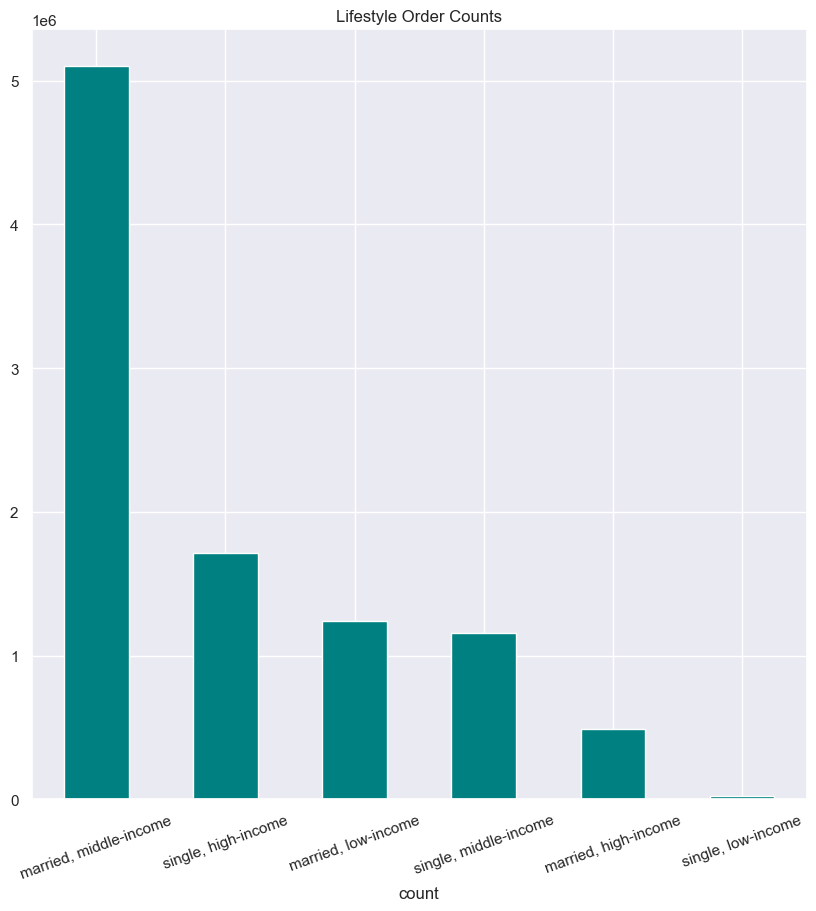

In [38]:
bar_2=df_small['Lifestyle'].value_counts().plot.bar(title = 'Lifestyle Order Counts', xlabel = 'count', color=['teal'])
plt.xticks(rotation=20)
plt.show()

In [39]:
bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Lifestyle Order Counts.png'))

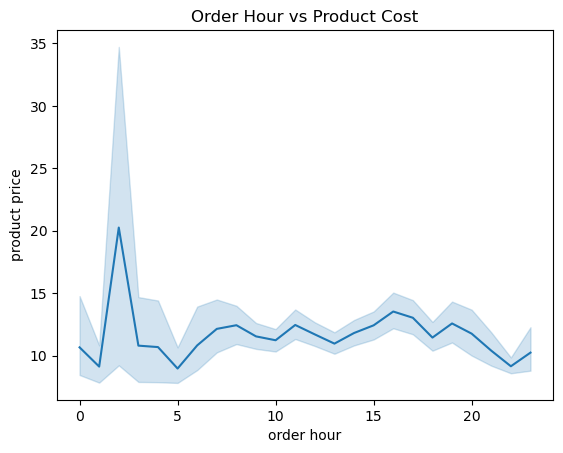

In [14]:
#Create Line Chart for the 30% sample
bar_3=sns.lineplot(data=df_small, x='order_hour_of_day', y='prices')
plt.title('Order Hour vs Product Cost')
plt.xlabel('order hour')
plt.ylabel('product price')

plt.xticks(rotation=0)
plt.show()

In [30]:
bar_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Order Hour vs Product Cost.png'))

Text(0.5, 1.0, 'Age vs Income')

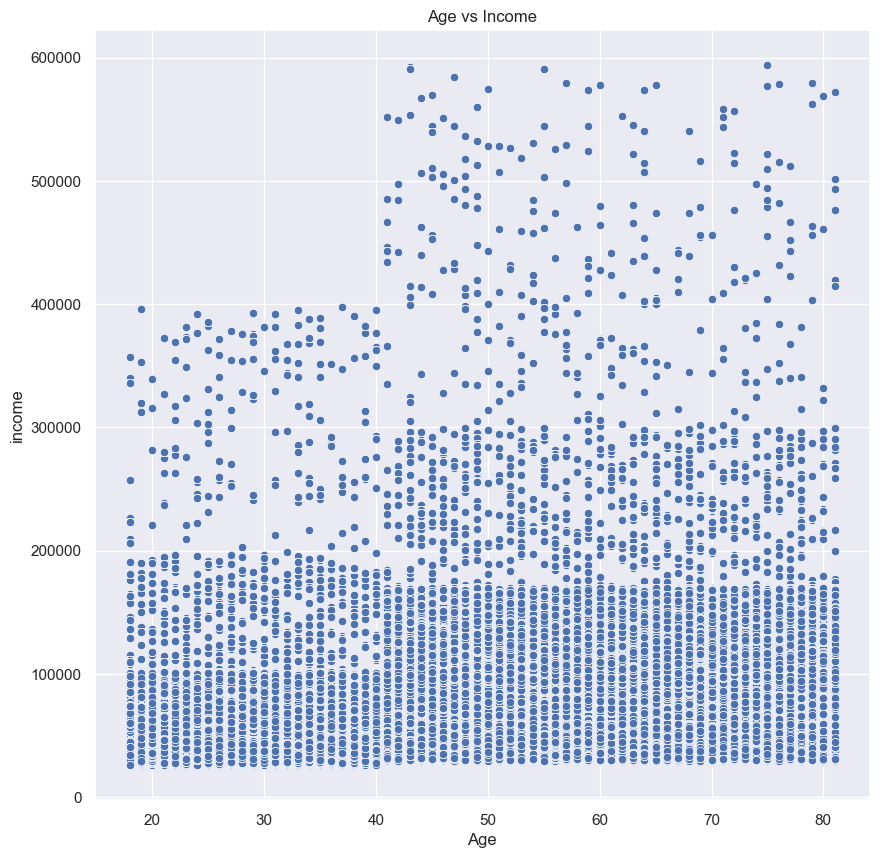

In [32]:
#Create Scatterplot for the 30% sample
bar_4=sns.scatterplot(data=df_small, x='Age', y='income')
plt.title('Age vs Income')

In [33]:
bar_4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Age vs Income.png'))

In [ ]:
plt.title('Order Hour vs Product Cost')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()

In [15]:
pie=df_small['Shopping_Behavior'].value_counts(dropna=False)

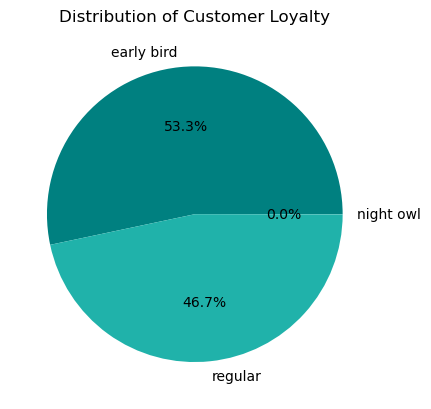

In [20]:
bar_5 = plt.pie(pie, labels=pie.index, autopct='%1.1f%%',  colors=['teal', 'lightseagreen', 'paleturquoise',])
plt.title('Distribution of Customer Loyalty')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Shopping Behavior.png'))

In [ ]:
# Create a new column "region" using loc function with mapping
df_small['region'] = 'West'

df_small.loc[df_small['State'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'region'] = 'Northeast'

df_small.loc[df_small['State'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] = 'Midwest'

df_small.loc[df_small['State'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'region'] = 'South'

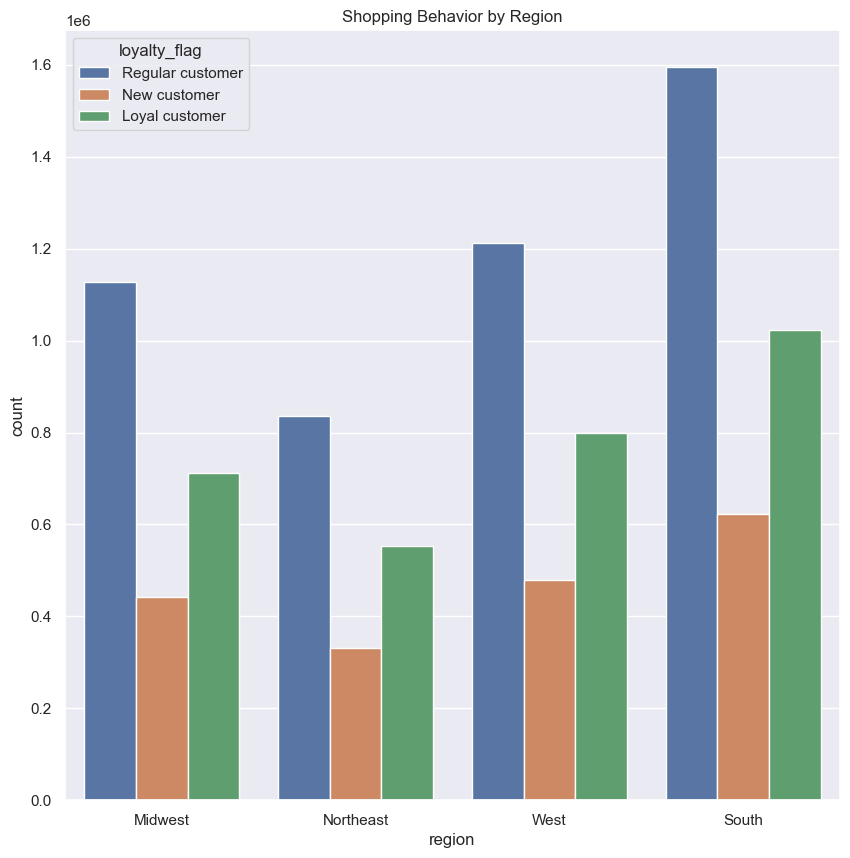

In [22]:
bar_6 = sns.countplot(x='region',hue='loyalty_flag',data=df_small)
sns.set(rc={'figure.figsize':(10,10)})
plt.title("Shopping Behavior by Region")
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Shopping Behavior by Region.png'))

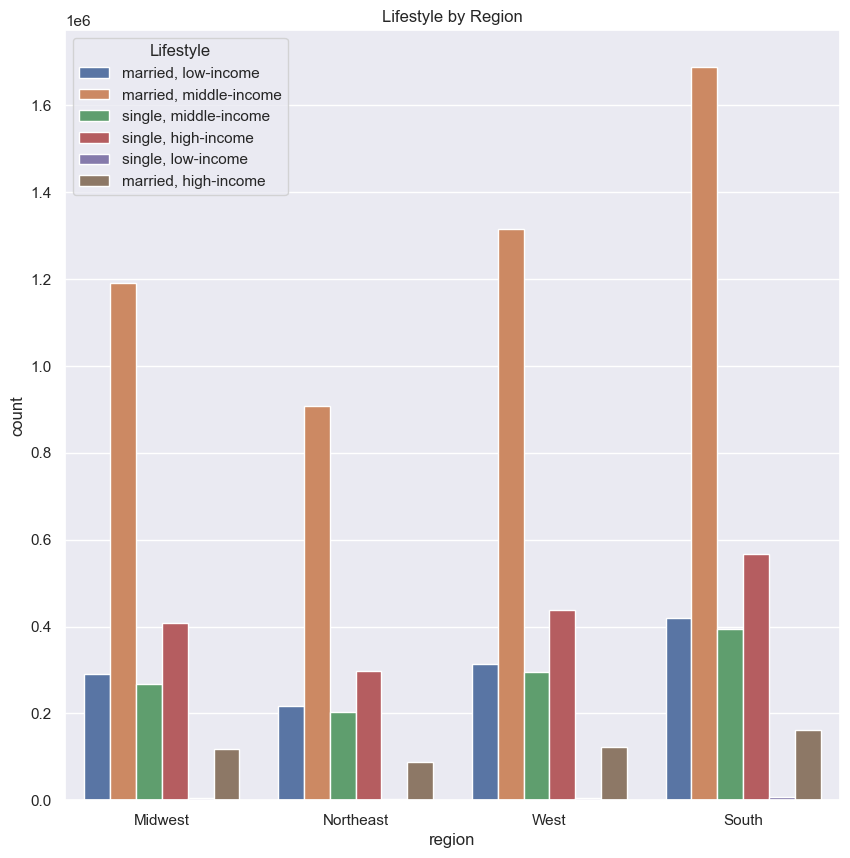

In [40]:
bar_7 = sns.countplot(x='region',hue='Lifestyle',data=df_small)
sns.set(rc={'figure.figsize':(10,10)})
plt.title("Lifestyle by Region")
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Lifestyle by Region.png'))

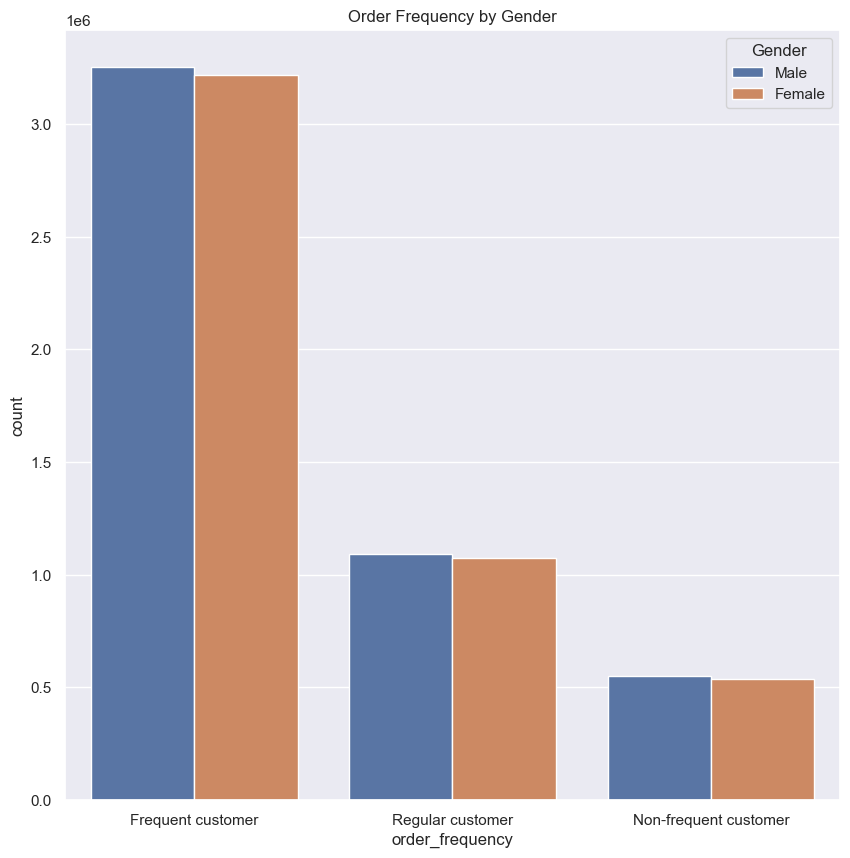

In [49]:
bar_9 = sns.countplot(x='order_frequency',hue='Gender',data=df_small)
sns.set(rc={'figure.figsize':(10,10)})
plt.title("Order Frequency by Gender")
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Order Frequency by Gender'))

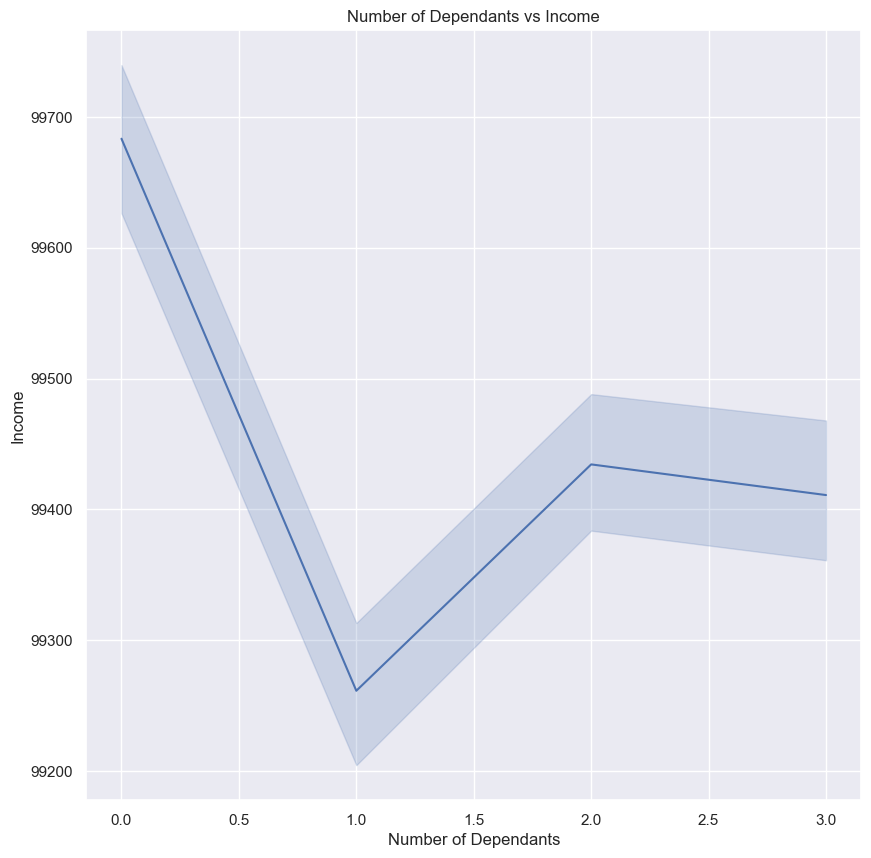

In [47]:
bar_8 =sns.lineplot(data=df_small, x='Dependants', y='income')
plt.title('Number of Dependants vs Income')
plt.xlabel('Number of Dependants')
plt.ylabel('Income')

plt.xticks(rotation=0)
plt.show()

In [48]:
bar_8.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Number of Dependants vs Income.png'))